In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [362]:
data = pd.read_csv('fraude_bancaire_synthetique_final.csv')
data.head()

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0


In [363]:
data.describe()

,age,salaire,score_credit,montant_transaction,anciennete_compte,fraude
count,1003.000000,1002.000000,998.000000,9.960000e+02,999.000000,982.000000
mean,40.408051,297164.636768,49.567810,5.088725e+06,9.655656,0.045825
std,7.805954,136089.166672,19.142124,2.843704e+06,4.815800,0.209212
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000
25%,35.205528,195695.682449,36.335605,3.118899e+06,6.000000,0.000000
50%,40.452085,294562.124263,49.642099,4.982903e+06,10.000000,0.000000
75%,45.614974,391034.624076,62.795183,6.926266e+06,13.000000,0.000000
max,60.000000,715256.040844,99.000000,1.513330e+07,25.000000,1.000000


In [364]:
data.dtypes

age                    float64
salaire                float64
score_credit           float64
montant_transaction    float64
anciennete_compte      float64
type_carte              object
region                  object
genre                   object
fraude                 float64
dtype: object

In [365]:
data['fraude'].value_counts()

fraude
0.0    937
1.0     45
Name: count, dtype: int64

on constate un desequilibre dans les classes de la variable cible "fraude" 
on va donc utiliser une technique de reechantillonnage pour equilibrer les classes lors du split de donnees 

In [366]:
data.isnull().sum()


age                    17
salaire                18
score_credit           22
montant_transaction    24
anciennete_compte      21
type_carte             23
region                 17
genre                  23
fraude                 38
dtype: int64

In [367]:

# remplacer les valeurs manquantes numerique  par la moyenne

num_columns = data.select_dtypes(include='number').columns 
 
for col in num_columns:
    data[col] = data[col].fillna(data[col].mean())
    

# remplacer les valeurs manquantes par le mode

object_columns = data.select_dtypes(include='object').columns

for col in object_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [368]:
data.isna().sum()

age                    0
salaire                0
score_credit           0
montant_transaction    0
anciennete_compte      0
type_carte             0
region                 0
genre                  0
fraude                 0
dtype: int64

In [369]:
data['type_carte'].nunique()

2

In [370]:
data['fraude'].value_counts()

fraude
0.000000    937
1.000000     45
0.045825     38
Name: count, dtype: int64

Ici on se retouve va a un incoherence avec une classe = 0.045825 pour la corrigée  ramenons tout les valeur de 0.045825 a 0 

In [371]:
data.loc[ data['fraude'].between(0,1, inclusive='neither'),'fraude']=0

In [372]:
object_columns

Index(['type_carte', 'region', 'genre'], dtype='object')

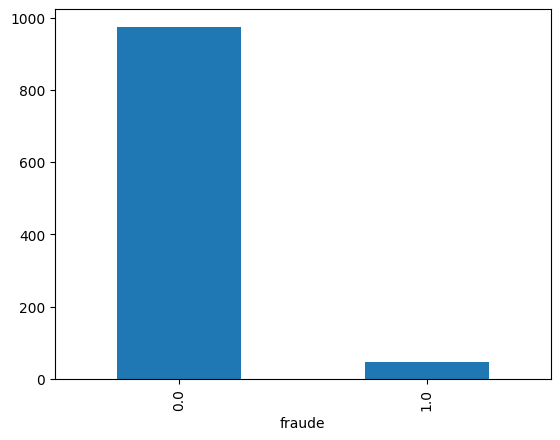

In [373]:
#observons distribution de la variable cible "fraude" avec matplolib

data['fraude'].value_counts().plot(kind='bar')
plt.show()




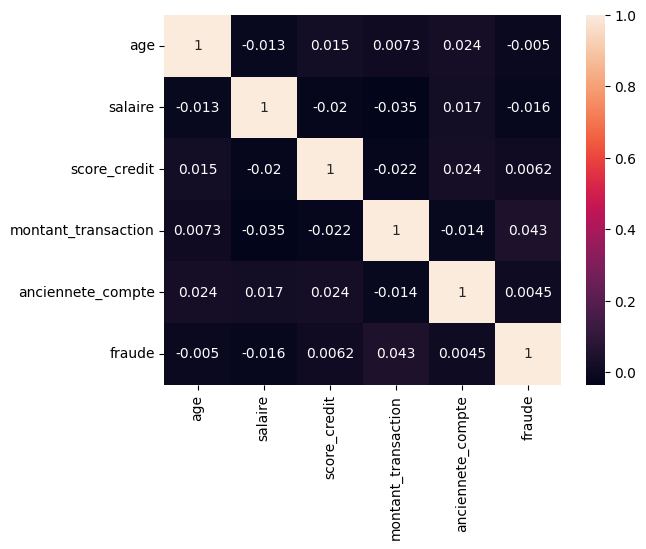

In [374]:
# matrice ce corellation 

sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show()

#### On a des variables numérique qui ont une correlation lineaire tres faibles 

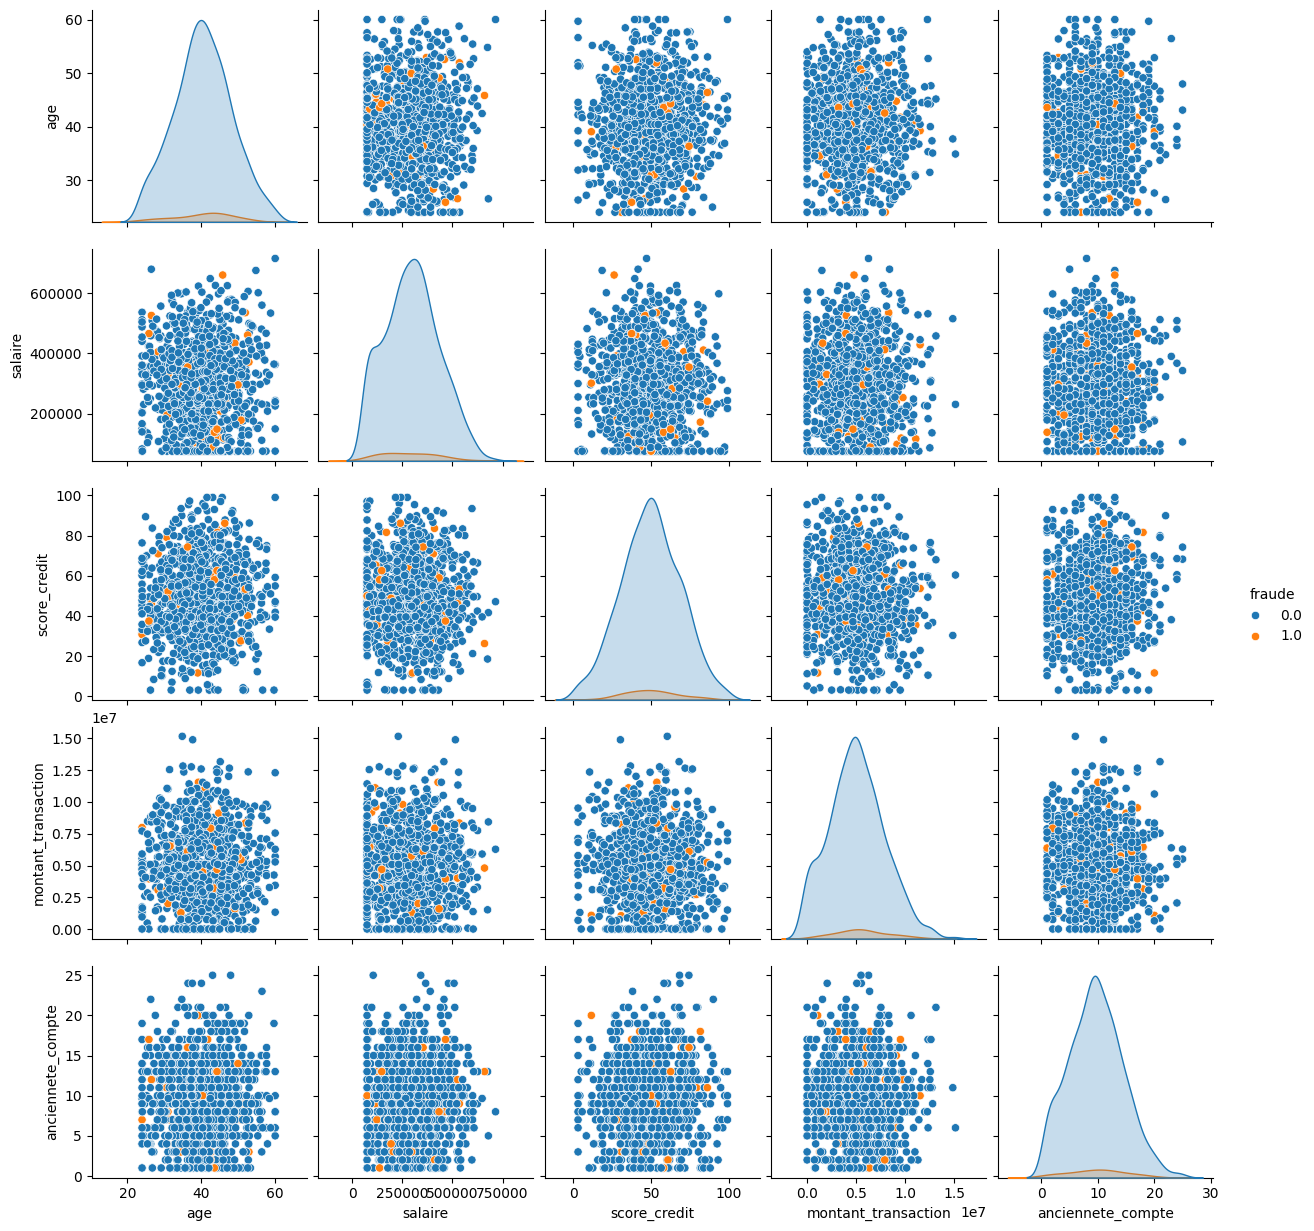

In [375]:
# visualisons les relations entre les variables numérique parraport a la variable fraude#
sns.pairplot(data, hue='fraude')
plt.show()


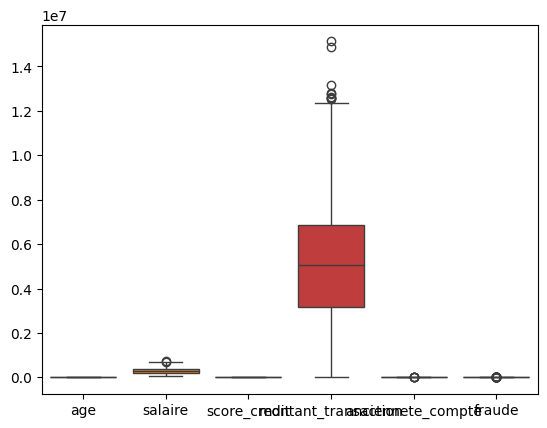

In [376]:
# observation des valeur aberantes 

sns.boxplot(data=data)
plt.show()

vue le contexte critique dans le quel nous travaillons a savoir detecter les fraudeur, Nous allons 
Conserver les donnees dites aberrantes 


## Encodage des variables categorielle 


In [377]:
# Label Encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['type_carte', 'genre']:
    data.loc[:,[col]] = le.fit_transform(data[col])
    
# Frequency Encoder

fe = data['region'].value_counts()/len(data)
data['region'] =  data['region'].map(fe)


In [378]:
data.head()

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0,0.395098,0,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0,0.395098,0,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1,0.395098,1,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0,0.315686,0,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0,0.315686,0,0.0


# Construction du Modele 

## separation des variables independantes et dependantes


In [379]:

X=data.drop('fraude', axis=1)
y=data['fraude']

In [380]:
# spliter les donnees en train et en test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [381]:
X_train.shape[0]

816

In [382]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reechantillonage (SMOTE)

In [383]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [384]:
X_train_res.shape[0]

1568


# Construction et Entrainement du modele

In [385]:
import xgboost as xgb
from xgboost import XGBClassifier


In [386]:
D_Train = xgb.DMatrix(X_train_res, label=y_train_res)
D_Test = xgb.DMatrix(X_test, label=y_test)

param = {
    'max_depth':5,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'aucpr',
    'subsample': 0.8,
    'seed':42,
    'gamma': 1
    
    }
steps = 30 

# entrainement du modele
classifier = xgb.train(param, D_Train, steps)

# Evalution des metrics

In [387]:


# Evaluation du modele sur les donnees de train et de test
y_train_pred = classifier.predict(D_Train)
y_test_pred = classifier.predict(D_Test)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Train Accuracy:", accuracy_score(y_train_res, y_train_pred.round()))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred.round()))

Train Accuracy: 0.9725765306122449
Test Accuracy: 0.8823529411764706


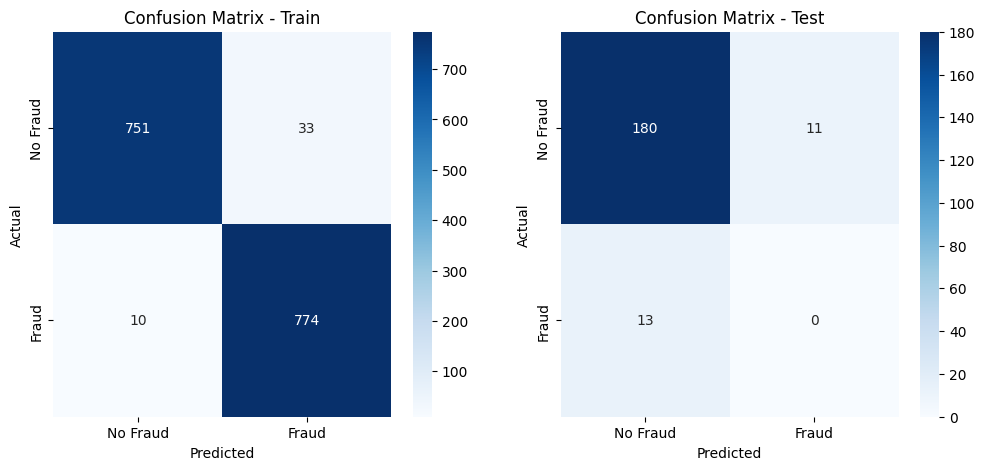

In [388]:
# confusion matrix for train and test
cm_train = confusion_matrix(y_train_res, y_train_pred.round())
cm_test = confusion_matrix(y_test, y_test_pred.round())
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - Train')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [389]:
# classification report for train and test
print("Train Classification Report:\n", classification_report(y_train_res, y_train_pred.round()))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred.round()))

Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       784
         1.0       0.96      0.99      0.97       784

    accuracy                           0.97      1568
   macro avg       0.97      0.97      0.97      1568
weighted avg       0.97      0.97      0.97      1568

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       191
         1.0       0.00      0.00      0.00        13

    accuracy                           0.88       204
   macro avg       0.47      0.47      0.47       204
weighted avg       0.87      0.88      0.88       204



In [390]:
for t in [0.3, 0.4, 0.5]:
    y_pred_labels = (y_test_pred > t).astype(int)
    print(f"\nSeuil : {t}")
    print(classification_report(y_test, y_pred_labels))



Seuil : 0.3
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       191
         1.0       0.00      0.00      0.00        13

    accuracy                           0.76       204
   macro avg       0.46      0.41      0.43       204
weighted avg       0.86      0.76      0.81       204


Seuil : 0.4
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       191
         1.0       0.00      0.00      0.00        13

    accuracy                           0.83       204
   macro avg       0.46      0.44      0.45       204
weighted avg       0.87      0.83      0.85       204


Seuil : 0.5
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       191
         1.0       0.00      0.00      0.00        13

    accuracy                           0.88       204
   macro avg       0.47      0.47      0.47       204
weighted avg       0.87      0.88  

# Enregistrement du modele 

In [ ]:
import joblib
joblib.dump(classifier, "xgb_model.pkl")
print("✅ Modèle XGBoost sauvegardé sous 'best_xgb_model.pkl'")

In [391]:
from collections import Counter
print(Counter(y_test))


Counter({0.0: 191, 1.0: 13})
